In [1]:
from fbprophet import Prophet
import snow.utils as sf
import pandas as pd

In [2]:
interactions_df = sf.from_snow(db='all_data'
                                 ,wh='load_wh'
                                 ,role='all_data_viewer'
                                 ,q_kind='interactions')

INFO:snowflake.connector.connection:Snowflake Connector for Python Version: 1.7.8, Python Version: 3.7.2, Platform: Darwin-18.2.0-x86_64-i386-64bit
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): livenpay.ap-southeast-2.snowflakecomputing.com
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): ocsp.snowflakecomputing.com
INFO:snowflake.connector.cursor:query: [use warehouse load_wh]


Using all_data_viewer...
Established connection.


INFO:snowflake.connector.cursor:query execution done
INFO:snowflake.connector.cursor:query: [use all_data.postgres]
INFO:snowflake.connector.cursor:query execution done
INFO:snowflake.connector.cursor:query: [WITH user_transaction_number AS (WITH ranked_transactions AS (SELECT user_id, id...]


Querying load_wh.all_data.postgres


INFO:snowflake.connector.cursor:query execution done
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): sfc-aus-ds1-customer-stage.s3.amazonaws.com
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): sfc-aus-ds1-customer-stage.s3.amazonaws.com
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): sfc-aus-ds1-customer-stage.s3.amazonaws.com
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): sfc-aus-ds1-customer-stage.s3.amazonaws.com
INFO:snowflake.connector.cursor:fetching data done


Interactions data:  ('slr1231@naver.com', '388595', '2019-05-25', None, None, None, Decimal('7.000000'), 'No', 'Melbourne', 965, 'Gotcha!', 1443, '2019-05-25', Decimal('7.000000000000')) 



INFO:snowflake.connector.connection:closed
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): livenpay.ap-southeast-2.snowflakecomputing.com
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): livenpay.ap-southeast-2.snowflakecomputing.com


Connection succesfully closed.


In [34]:
interactions_df.head()

,email,userId,funnel1,funnel2,funnel3,funnel10,amount,is_inorganic,city,merchantId,merchant,branchId,date,aov
0,sharon.h.wong@icloud.com,104705,2019-05-24,2019-05-24,None,None,60.000000,No,Sydney,1023,Din Tai Fung,1534,2019-05-24,60.000000000000
1,briancrv1309@gmail.com,291936,2019-05-24,None,None,None,44.000000,Yes,Sydney,996,BL Burgers,1494,2019-05-24,44.000000000000
2,ngan.nguyennn@gmail.com,51849,2019-05-24,None,None,None,6.500000,Yes,Sydney,861,CoCo Fresh Tea & Juice,1245,2019-05-24,6.500000000000
3,bcoxon22@googlemail.com,390707,2019-05-24,None,None,None,15.400000,Yes,Sydney,1044,Burger Project,1574,2019-05-24,15.400000000000
4,brunoscheel@live.cl,358482,2019-05-24,None,None,None,11.000000,Yes,Melbourne,858,L' Burger,1236,2019-05-24,11.000000000000


In [106]:
from datetime import datetime, timedelta

output = []

interactions_df.date = pd.to_datetime(interactions_df.date)

for date in interactions_df.drop_duplicates(subset='date').sort_values(by='date').date:
    end_date = date

    start_date = (end_date - timedelta(days=28))
    
    temp_df = interactions_df[interactions_df.date<=str(end_date)]
    
    valid_users = interactions1_df[interactions1_df.date<str(start_date)].userId.unique()
    
    temp2_df = temp_df[temp_df.date>=str(start_date)]
    
    temp3_df = temp2_df[temp2_df.userId.isin(valid_users)]
    
    final_df = temp3_df[temp3_df.is_inorganic=='No']
    try:
        total_vol = final_df.amount.sum()
        total_count = final_df.shape[0]
        user_count = final_df.userId.nunique()
        mean_vol = total_vol / user_count
        mean_count = total_count / user_count
        output += [(date,mean_vol)]
        
    except:
        pass

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [116]:
okr = pd.DataFrame(output,columns=['ds','y'])

In [108]:
okr.head()

,date,mean_vol
0,2018-06-02,21.62621359223300970873786408
1,2018-06-03,21.06176781002638522427440633
2,2018-06-04,20.14643410852713178294573643
3,2018-06-05,20.49804379562043795620437956
4,2018-06-06,21.42320848938826466916354557


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
type(okr[['date','mean_vol']].date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [111]:
sns.lineplot(x='date',y='mean_vol',date=okr)

ValueError: Could not interpret input 'date'

In [112]:
okr.plot(x='date',y='mean_vol')

TypeError: Empty 'DataFrame': no numeric data to plot

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


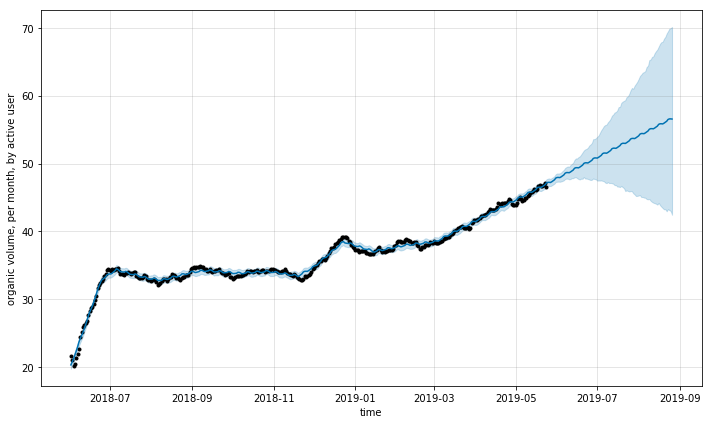

In [120]:
m = Prophet()
m.fit(okr)
future = m.make_future_dataframe(periods=94)
forecast = m.predict(future)
fig1 = m.plot(forecast,ylabel='organic volume, per month, by active user',xlabel='time')

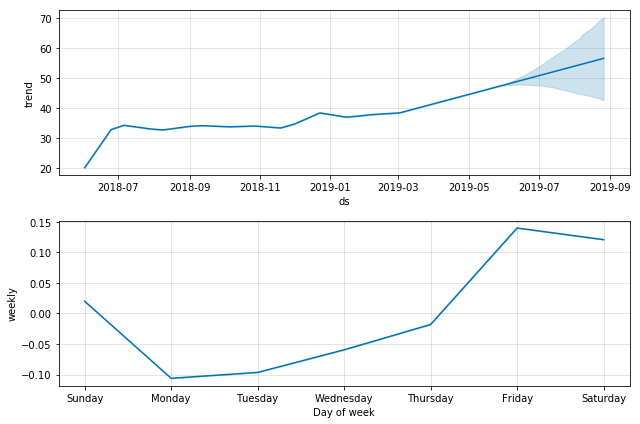

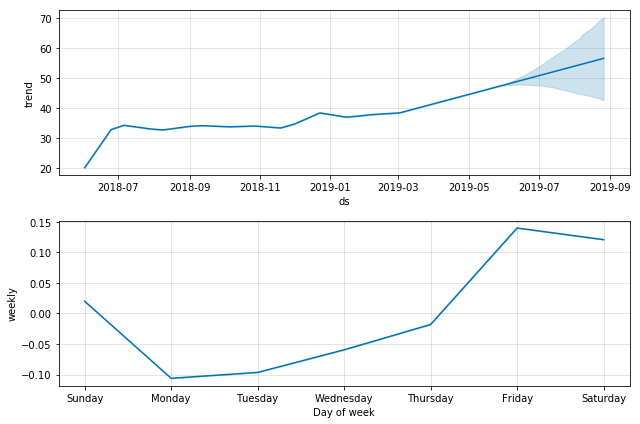

In [121]:
m.plot_components(forecast)

In [122]:
from datetime import datetime, timedelta

output = []

interactions_df.date = pd.to_datetime(interactions_df.date)

for date in interactions_df.drop_duplicates(subset='date').sort_values(by='date').date:
    end_date = date

    start_date = (end_date - timedelta(days=28))
    
    temp_df = interactions_df[interactions_df.date<=str(end_date)]
    
    valid_users = interactions1_df[interactions1_df.date<str(start_date)].userId.unique()
    
    temp2_df = temp_df[temp_df.date>=str(start_date)]
    
    temp3_df = temp2_df[temp2_df.userId.isin(valid_users)]
    
    final_df = temp3_df[temp3_df.is_inorganic=='No']
    try:
        total_vol = final_df.amount.sum()
        total_count = final_df.shape[0]
        user_count = final_df.userId.nunique()
        mean_vol = total_vol / user_count
        mean_count = total_count / user_count
        output += [(date,mean_count)]
        
    except:
        pass

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [123]:
okr = pd.DataFrame(output,columns=['ds','y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


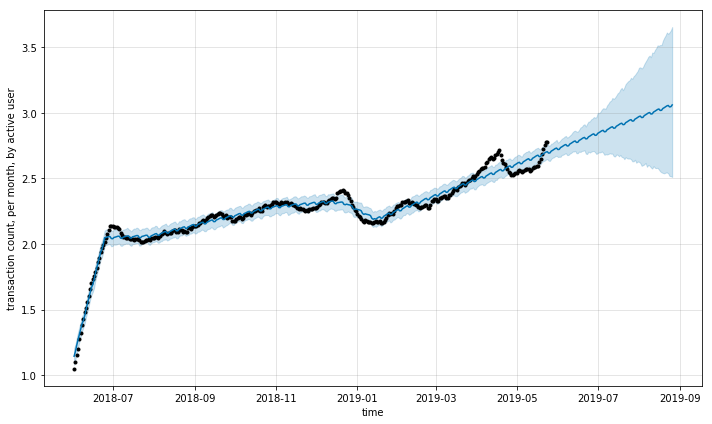

In [126]:
m = Prophet()
m.fit(okr)
future = m.make_future_dataframe(periods=94)
forecast = m.predict(future)
fig1 = m.plot(forecast,ylabel='transaction count, per month, by active user',xlabel='time')

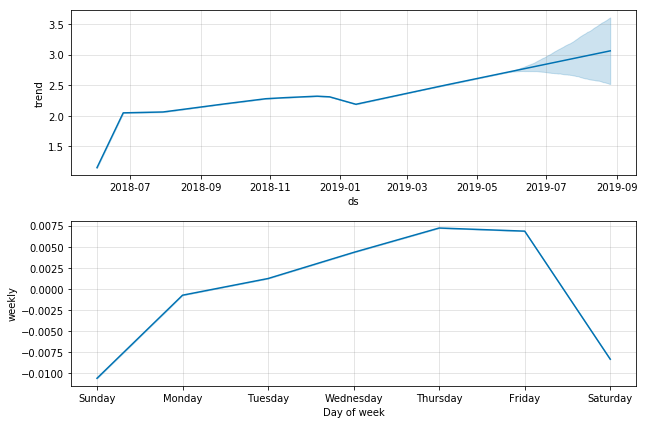

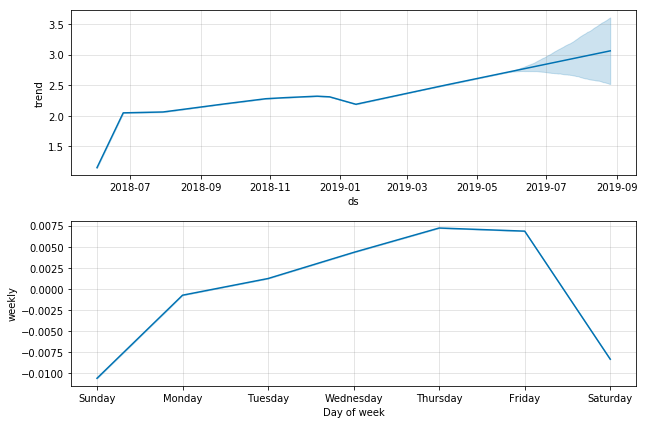

In [125]:
m.plot_components(forecast)